In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("Data_for_UCI_named.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [46]:
df.shape

(10000, 14)

In [47]:
df.isnull().sum()#no null values

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [48]:
#we drop stab and then check the distribution of the target variables
df["stabf"].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [49]:
#encode the target variable stabf
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#we fit and transform the dataframe assign it back to a dataframe
df.stabf= le.fit_transform(df.stabf)#it will take the column and return the label

In [50]:
#then we drop the stab(an unwanted column) and stabf(target variable) for x,
X = df.drop(["stab","stabf"], axis = 1)

In [51]:
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [52]:
y = df.stabf #the encoded target variable

In [53]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: stabf, dtype: int32

In [54]:
#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [55]:
y_train.value_counts()

1    5092
0    2908
Name: stabf, dtype: int64

In [56]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_train_df = scaler.fit_transform(X_train)
normalised_train_df = pd.DataFrame(normalised_train_df,columns=X_train.columns)
X_test = X_test.reset_index(drop=True)


normalised_test_df = scaler.transform(X_test)
normalised_test_df = pd.DataFrame(normalised_test_df,columns=X_test.columns)

In [57]:
normalised_train_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [58]:
normalised_test_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.593951,-0.412733,1.503924,1.116943,0.403423,-1.492971,-0.785033,1.566781,-0.901007,1.167203,-1.507330,1.084726
1,0.202190,0.374416,-0.188800,-0.522268,-0.225967,-1.058483,0.420047,1.028627,-1.625721,-0.395660,1.414651,1.226011
2,-1.079044,-0.313745,-0.884634,0.017080,-0.943122,0.112653,0.801335,0.733004,1.457108,-1.438495,0.651821,-1.682168
3,-0.083120,-1.107327,0.372805,-1.708152,0.753990,-1.637972,0.403805,-0.088036,0.083322,-1.672322,-0.357714,1.055865
4,0.873921,1.438466,0.086662,1.715037,-0.153880,-0.007015,-0.197053,0.472315,0.136549,-1.469731,0.956396,-0.819727


In [59]:
y_train.shape

(8000,)

In [60]:
normalised_train_df.shape

(8000, 12)

In [61]:
y_test.shape

(2000,)

In [62]:
normalised_test_df.shape

(2000, 12)

In [64]:
#using a Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, y_train)

LogisticRegression()

In [70]:
#check the cross vlidation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_train, cv=5, scoring='f1_macro')
scores

array([0.8049015 , 0.80345987, 0.80785034, 0.79645688, 0.7835111 ])

In [71]:
#import allmetrics to check performance of the models
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_pred = log_reg.predict(normalised_test_df)
cnf_mat = confusion_matrix(y_test, y_pred)

In [72]:
cnf_mat

array([[ 494,  218],
       [ 174, 1114]], dtype=int64)

# using random forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
# fit the model on the train dataset
model.fit(normalised_train_df,y_train)

RandomForestClassifier(random_state=1)

In [76]:
#pedict using the normalised scaled test dataset
y_pred = model.predict(normalised_test_df)

In [77]:
#construct the confusion matrix
cnf_mat1 = confusion_matrix(y_test, y_pred)
cnf_mat1

array([[ 625,   87],
       [  55, 1233]], dtype=int64)

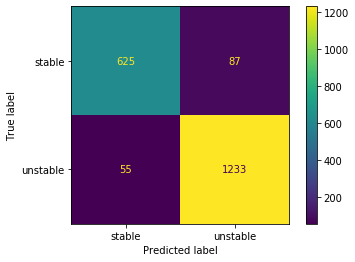

In [79]:
#plot the confusion matrix
plot_confusion_matrix(model, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["stable", "unstable"])

In [81]:
#get the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           0     0.9191    0.8778    0.8980       712
           1     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



# Other model evaluation parameters

In [82]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 93.0


In [83]:
precision = precision_score(y_test, y_pred)
print('Precision: {}'.format(round(precision*100), 2))


Precision: 93.0


In [84]:
recall = recall_score(y_test, y_pred)
print('Recall: {}'.format(round(recall*100), 2)) 

Recall: 96.0


In [85]:
f1 = f1_score(y_test, y_pred)
print('F1: {}'.format(round(f1*100), 2))

F1: 95.0



# Using Extra Tree Classifier¶


In [148]:
from sklearn.ensemble import ExtraTreesClassifier

In [149]:
modelE = ExtraTreesClassifier(random_state=1)#instatiate the extratree classifier

In [150]:
modelE.fit(normalised_train_df,y_train)#fit the model

ExtraTreesClassifier(random_state=1)

In [151]:
y_pred = modelE.predict(normalised_test_df)#predict the test dta

In [152]:
#get the confusion matrix
cnf_mat1 = confusion_matrix(y_test, y_pred)
cnf_mat1

array([[ 606,  106],
       [  38, 1250]], dtype=int64)

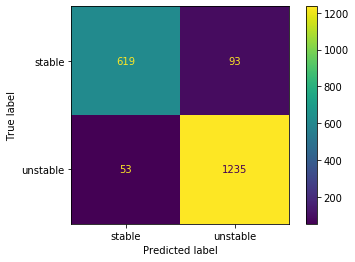

In [153]:
#plot the confusion matrix
plot_confusion_matrix(model, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["stable", "unstable"])

In [154]:
#get the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           0     0.9410    0.8511    0.8938       712
           1     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



# using randomizedsearch cv on the extratree with the following parameters 

In [95]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
model = RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1),
                            param_distributions=hyperparameter_grid,random_state=1)
model.fit(normalised_train_df, y_train)


RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1),
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1)

In [ ]:
# feat = pd.Series(model.feature_importances_,index = X.columns)
# feature_importances_.nlargest(10).plot(kind ="barh")

In [100]:
#best estimator 
model.best_estimator_

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000,
                     random_state=1)

In [101]:
y_pred = model.predict(normalised_test_df)

In [102]:
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           0     0.9211    0.8694    0.8945       712
           1     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



In [103]:
cnf = confusion_matrix(y_test, y_pred)
cnf

array([[ 619,   93],
       [  53, 1235]], dtype=int64)

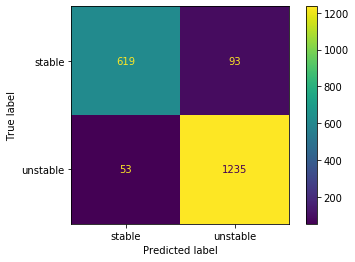

In [104]:
#plot the confusion matrix
plot_confusion_matrix(model, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["stable", "unstable"])

In [105]:
model.best_params_.values()

dict_values([1000, 2, 8, None])

In [106]:
#using the best params values on the extratree 
hyperparameter_grid = {'n_estimators': [1000],
                       'min_samples_leaf': [8],
                       'min_samples_split': [2],
                       'max_features': [None]}
model = RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1),
                            param_distributions=hyperparameter_grid,random_state=1)
model.fit(normalised_train_df, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1),
                   param_distributions={'max_features': [None],
                                        'min_samples_leaf': [8],
                                        'min_samples_split': [2],
                                        'n_estimators': [1000]},
                   random_state=1)

In [108]:
y_pred = model.predict(normalised_test_df)

In [109]:
matrix1 = confusion_matrix(y_test, y_pred)
matrix1

array([[ 619,   93],
       [  53, 1235]], dtype=int64)

In [111]:
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           0     0.9211    0.8694    0.8945       712
           1     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



In [112]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 93.0


In [113]:
precision = precision_score(y_test, y_pred)
print('Precision: {}'.format(round(precision*100), 2))

Precision: 93.0


In [114]:
recall = recall_score(y_test, y_pred)
print('Recall: {}'.format(round(recall*100), 2)) #prints 51

Recall: 96.0


In [115]:
f1 = f1_score(y_test, y_pred)
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

F1: 94.0


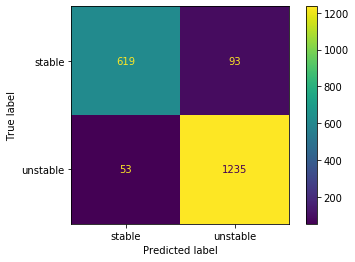

In [116]:
#plot the confusion matrix
plot_confusion_matrix(model, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["stable", "unstable"])

# using  x g boost


In [117]:
from xgboost import XGBClassifier
modelxgb = XGBClassifier(random_state=1)
modelxgb.fit(normalised_train_df, y_train)

XGBClassifier(random_state=1)

In [118]:
y_pred = modelxgb.predict(normalised_test_df)

In [120]:
matrixx = confusion_matrix(y_test, y_pred)
matrixx

array([[ 603,  109],
       [  52, 1236]], dtype=int64)

In [121]:
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           0     0.9206    0.8469    0.8822       712
           1     0.9190    0.9596    0.9389      1288

    accuracy                         0.9195      2000
   macro avg     0.9198    0.9033    0.9105      2000
weighted avg     0.9195    0.9195    0.9187      2000



In [122]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 92.0


In [123]:
precision = precision_score(y_test, y_pred)
print('Precision: {}'.format(round(precision*100), 2))

Precision: 92.0


In [124]:
recall = recall_score(y_test, y_pred)
print('Recall: {}'.format(round(recall*100), 2)) #prints 51.0

Recall: 96.0


In [125]:
f1 = f1_score(y_test, y_pred)
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

F1: 94.0


# using LGBM Classifier¶


In [126]:
from lightgbm import LGBMClassifier
modellgbmc = LGBMClassifier(random_state=1)
# fit the model on the whole dataset
modellgbmc.fit(normalised_train_df, y_train)

LGBMClassifier(random_state=1)

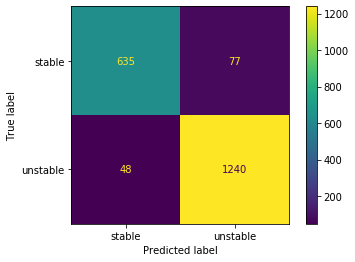

In [127]:
plot_confusion_matrix(modellgbmc, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["stable", "unstable"])


In [128]:
y_pred = modellgbmc.predict(normalised_test_df)

In [129]:
cnf_mat4 = confusion_matrix(y_test,y_pred)
cnf_mat4

array([[ 635,   77],
       [  48, 1240]], dtype=int64)


# Other model evaluation parameters¶


In [130]:
print(classification_report(y_test,y_pred,digits = 3))

              precision    recall  f1-score   support

           0      0.930     0.892     0.910       712
           1      0.942     0.963     0.952      1288

    accuracy                          0.938      2000
   macro avg      0.936     0.927     0.931      2000
weighted avg      0.937     0.938     0.937      2000



In [132]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 94.0


In [133]:
precision = precision_score(y_test, y_pred)
print('Precision: {}'.format(round(precision*100), 2))

Precision: 94.0


In [134]:
recall = recall_score(y_test, y_pred)
print('Recall: {}'.format(round(recall*100), 2)) #prints 51.0

Recall: 96.0


In [135]:
f1 = f1_score(y_test, y_pred)
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

F1: 95.0


In [141]:
#computing roc_auc_curve score
from sklearn.metrics import roc_auc_score, roc_curve
model_extratree = roc_auc_score(y_test, y_pred)
xgboost_model = roc_auc_score(y_test, y_pred)
lgbc_model = roc_auc_score(y_test, y_pred)
forest_model = roc_auc_score(y_test, y_pred)

In [142]:
print("Random Forest ROC_AUC score: " ,model_extratree)
print("Extra tree cls ROC_AUC score:", xgboost_model)
print("XGBOOST ROC_AUC score:       " ,lgbc_model)
print("LIGHTGBM ROC_AUC score:      " ,forest_model)

Random Forest ROC_AUC score:  0.9272934259194642
Extra tree cls ROC_AUC score: 0.9272934259194642
XGBOOST ROC_AUC score:        0.9272934259194642
LIGHTGBM ROC_AUC score:       0.9272934259194642


Text(0, 0.5, 'True positive rate')

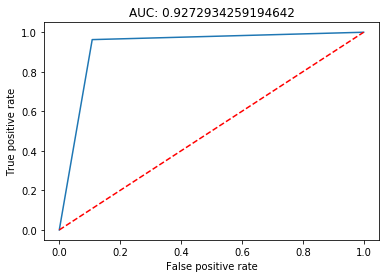

In [145]:
#plotting the roc curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

auc = roc_auc_score(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title(f'AUC: {auc}')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')

In [156]:
#feature importance for extratree classifier
import numpy as np
extra_feature_importance = modelE.feature_importances_
importance_df = pd.DataFrame(np.array(X.columns), np.array(extra_feature_importance), columns=["feature_name"])
importance_df


,feature_name
0.117397,tau1
0.118445,tau2
0.113169,tau3
0.115466,tau4
0.039507,p1
0.040371,p2
0.040706,p3
0.040579,p4
0.089783,g1
0.093676,g2


<BarContainer object of 12 artists>

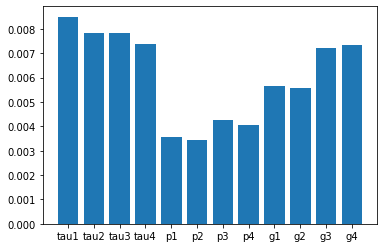

In [159]:
extra_feature_importance = np.std([tree.feature_importances_ for tree in
                                  modelE.estimators_], axis=0)

plt.bar(X.columns, extra_feature_importance)